In [4]:
% cd C:/Users/Garrett/Documents/GitHub/CheungGarrett/Animals_with_Attributes/
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from pylab import rcParams
from sklearn.decomposition import PCA

C:\Users\Garrett\Documents\GitHub\CheungGarrett\Animals_with_Attributes


In [6]:
samples_features = pd.read_fwf("predicate-matrix-continuous.txt", header=None).values
classes=pd.read_fwf("classes.txt", header=None)[1].values
clf=KMeans(init='k-means++', n_clusters=10, n_init=10)
clf.fit(samples_features, classes) #samples_features is a samples by features matrix
clusters = clf.predict(samples_features) # clusters are int32 from 0-9 for n_clusters = 10

grouping = {i:[] for i in range(0,10)}

for i,animal in enumerate(classes):
    grouping[clusters[i]].append(animal)

In [7]:
pca = PCA(n_components=2)
features_train_reduced = pca.fit_transform(samples_features)

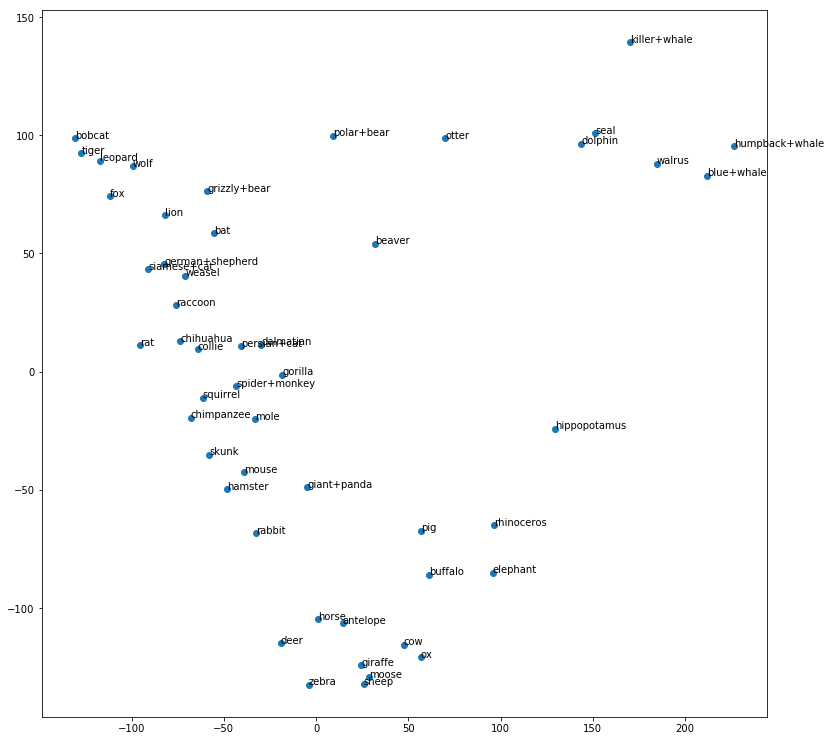

In [8]:
fig = plt.figure(1, figsize=(13, 13))
ax = fig.add_subplot(111)
for i,point in enumerate(features_train_reduced):
    ax.annotate(classes[i], xy=point, xytext=point)
    
plt.scatter(features_train_reduced[:,0], features_train_reduced[:,1])

**Classifying Digits**
SKLearn has many intereting datasets pre-loaded in it, one of which is load_digits (sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

You can load this dataset as follows

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()

And the images can be visualized as follows

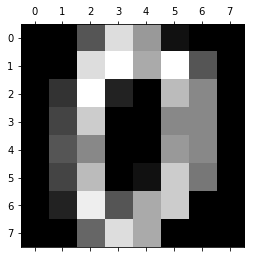

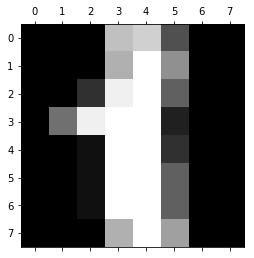

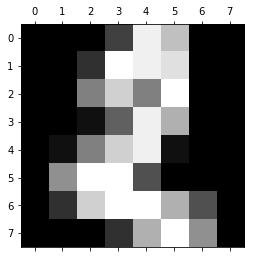

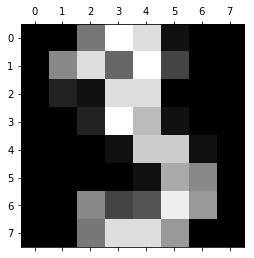

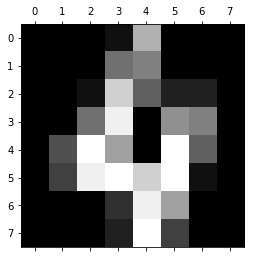

In [11]:
import pylab as pl
pl.gray() 
for i in range (5):
    pl.matshow(digits.images[i]) 
    pl.show() 

**Dimensionality Reduction - PCA**

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. 

Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). 
Use the sklearn inbuilt tool sklearn.decomposition.PCA

Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze the ammount of information thrown away and plot the variance(cumulative) against the number of components  



Original Matrix Size is: (1797, 64)
PCA Matrix Size is: (1797, 30)


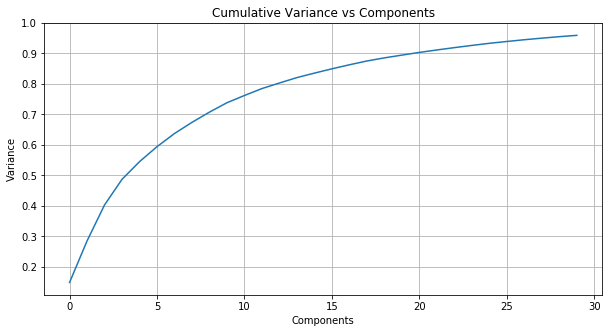

In [12]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
samples = len(digits.images)
matrix = digits.images.reshape((samples,-1))
print('Original Matrix Size is: ' + str(np.shape(matrix)))

k=30

pca = PCA(n_components=k)
pca.fit(matrix)
Transform_matrix = pca.transform(matrix)
print('PCA Matrix Size is: ' + str(np.shape(Transform_matrix)))

cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize = (10,5))
plt.plot(cumulative)
plt.title('Cumulative Variance vs Components')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.grid()


At 20 components, we can explain 90% of the variance in the dataset